# Homework 5: Regularization, Perceptron, and Deep Neural Networks

#### Edwin Ramirez, Kandace Mok, Darshil Desai

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv 
import seaborn as sns
import random
import time
import progressbar

In [2]:
movie_df = pd.read_csv('movieData.csv')

In [3]:
movie_df.head()

,Genre,CriticsRating,Watched
0,1,1.2,-1
1,1,3.5,1
2,1,4.2,1
3,2,3.9,1
4,2,2.8,-1


In [4]:
movie_df.shape

(13, 3)

In [5]:
sico_df = pd.read_csv('siCoData.csv')

In [6]:
sico_df.head()

,x,y
0,-0.889238,-0.334713
1,0.532539,0.898156
2,0.596540,0.870667
3,-0.375349,-0.713875
4,0.083465,0.401115


In [7]:
sico_df.shape

(250, 2)

## Problem 1 

Consider a learning scenario where the goal is to learn the target function $f(x) =
sin(πx)$ for $−1 \leq x \leq +1$ from two points in the training sets. The two training
points in $R^{2}$ have a uniform distribution between -1 and +1. You will create two
models in linear hypothesis set $y = mx + b$: 1) unregularized, 2) weight-decay
regularized (use L2 regularization with λ = 0.1).
1. (5 points) Generate 10,000 hypotheses for each version. Report the average hypothesis $\bar{g}(x)$ in each case.
2. (5 points) Find and report bias2 for each model.
3. (5 points) Find and report variance for each model
4. (5 Points) For each case, plot $\bar{g}(x)$ $\pm \sqrt{var}$ along with $\bar{g}(x)$ and target function $f(x) = sin(πx)$. Which model will you choose? Why? **Round your answers to 3 decimal places.**

In [8]:
random.seed(19999)
X = list(range(20000))
x_vals = [round(random.uniform(-1,1), 5) for val  in X]


#Generate point coordinates (x, f(x))
points = np.array([np.array([1, x, np.sin(np.pi*x)]) for x in x_vals])

In [9]:
point1 = points[0:10000]
point2 = points[10000:]

N = 10000

In [10]:
def unregularized(point_1, point_2):
    x_ = np.array([point_1[0:2], point_2[0:2]])
    y_ = np.array([point_1[2], point_2[2]])

    w =  np.dot(np.dot(np.linalg.inv(np.dot(x_.T, x_)), x_.T), y_)
    return w

In [11]:
#Slopes and intercepts for all models
unreg_w = np.array([unregularized(point1[i], point2[i]) for i in range(10000)]) 

In [12]:
avg_b = np.mean(unreg_w.T[0])
avg_m = np.mean(unreg_w.T[1])

### Unregularized Average Linear Hypothesis

In [13]:
print(" Unregularized Average Linear Hypothesis: y = " + str(round(avg_m,3)) +'x + ' + str(round(avg_b,3)))

 Unregularized Average Linear Hypothesis: y = 0.806x + 0.006


### Regularized Avg Linear Model

In [14]:
def regularize(point_1, point_2):
    X = np.array([point_1[0:2], point_2[0:2]])
    y = np.array([point_1[2], point_2[2]])
    lambda_I = np.identity(2)*0.1
    #w = np.dot(np.dot(np.linalg.inv(np.add(np.dot(x_.T, x_), lambda_I)), x_.T), y_)
    w = np.dot(inv(np.dot(X.T, X) + 0.1*np.identity(2)), np.dot(X.T, y))
    
    return w

In [15]:
reg_w = np.array([regularize(point1[i], point2[i]) for i in range(10000)])

In [16]:
avg_b_r = np.mean(reg_w.T[0])
avg_m_r = np.mean(reg_w.T[1])

In [17]:
print(" Regularized Average Linear Hypothesis: y = " + str(round(avg_m_r,3)) +'x + ' + str(round(avg_b_r,3)))

 Regularized Average Linear Hypothesis: y = 0.639x + 0.003


### Compute the $Bias^{2}$ of Each Model

In order to compute the $bias^{2}$ for all hypotheses, $g(x) = b$, we simply compute the differences between the target function values found in `points` and the average hypothesis $\bar{g}$ and square them.

$$bias(x) = \bar{g}(x) - f(x) \\
f(x) = sin(\pi x) \\
\bar{g}(x) = mx + b$$

In [18]:
#Get hypothesis values for all 20000 observations
g_bar_unr = np.array([points[i][1]*avg_m + avg_b for i in range(20000)])
g_bar_r = np.array([points[i][1]*avg_m_r + avg_b_r for i in range(20000)])


In [19]:
y = points.T[2]
y

array([-0.54770926,  0.92659691,  0.33284917, ..., -0.95332146,
        0.15376539, -0.79059767])

In [20]:
#Bias square values for unregularized model
bias_sq_unr = np.power(g_bar_unr - y, 2)
bias_sq_unr

array([0.16372238, 0.17540825, 0.15369748, ..., 0.40268885, 0.38265782,
       0.05017104])

In [21]:
#Bias square values of regularized model
bias_sq_r = np.power(g_bar_r - y, 2)
bias_sq_r

array([0.18755444, 0.27627223, 0.05766185, ..., 0.48934072, 0.20868087,
       0.11590344])

In [22]:
#Expected bias for each model
exp_bias_sq_unr = bias_sq_unr.mean()
exp_bias_sq_r = bias_sq_r.mean()

In [23]:
exp_bias_sq_unr

0.20287899566329956

In [24]:
exp_bias_sq_r

0.2290491749621517

In [25]:
print("Unregularized Bias Squared: " + str(round(exp_bias_sq_unr,3)))
print("Regularized Bias Squared: " + str(round(exp_bias_sq_r,3)))

Unregularized Bias Squared: 0.203
Regularized Bias Squared: 0.229


### Variance of Each Model

The variance for each hypothesis can be computed as the difference between the the hypothesis value $g(x)$ and average hypothesis, $\bar{g}(x)$ squared:

$$var = (g(x) - \bar{g}(x))^2$$

We compute the variance for all 10,000 hypotheses in the constant hypothesis set.

In [26]:
unreg_w[0]

array([-0.30556566,  1.31243143])

In [27]:
reg_w[0]

array([-0.22195373,  1.05953064])

In [28]:
g_bar_un = np.array([avg_b, avg_m])
g_bar_un

array([0.00567949, 0.80630095])

In [29]:
g_bar_r = np.array([avg_b_r, avg_m_r])
g_bar_r

array([0.00321631, 0.63875344])

In [30]:
def computeVar(avg_g, hypoth_g, point):
    g1 = np.array([hypoth_g[i][1]*point + hypoth_g[i][0] for i in range(10000)])
    g2 = avg_g[1]*point + avg_g[0]
    
    var = np.power(g1 - g2, 2)
    mean_var = np.mean(var)
    
    return mean_var

In [62]:
progress = progressbar.ProgressBar()
x_range = range(10000)
unreg_v = [computeVar(g_bar_un, unreg_w, points[i][1]) for i in progress(x_range)]

100% (10000 of 10000) |##################| Elapsed Time: 0:01:39 Time:  0:01:39


In [63]:
progress = progressbar.ProgressBar()
x_range = range(10000)
reg_v = [computeVar(g_bar_r, reg_w, points[i][1]) for i in progress(x_range)]

100% (10000 of 10000) |##################| Elapsed Time: 0:01:37 Time:  0:01:37


In [64]:
avg_v_un = round(np.mean(np.array(unreg_v)),3)
avg_v_r = round(np.mean(np.array(reg_v)), 3)
print("Variance for Unregularized Linear Model: ", avg_v_un)
print("Variance for Regularized Linear Model: ", avg_v_r)

Variance for Unregularized Linear Model:  1.625
Variance for Regularized Linear Model:  0.328


In [68]:
#Define range of target function
target_x = np.linspace(-1,1, 10000)
len(target_x)

10000

In [83]:
unr_lower_limit = [g_bar_un[1]*point1.T[1][i] + g_bar_un[0] - np.sqrt(unreg_v[i]) for i in range(10000)]

In [84]:
unr_upper_limit = [g_bar_un[1]*point1.T[1][i] + g_bar_un[0] + np.sqrt(unreg_v[i]) for i in range(10000)]

In [85]:
r_lower_limit = [g_bar_r[1]*point1.T[1][i] - g_bar_r[0] - np.sqrt(reg_v[i]) for i in range(10000)]
r_upper_limit = [g_bar_r[1]*point1.T[1][i] + g_bar_r[0] + np.sqrt(reg_v[i]) for i in range(10000)]

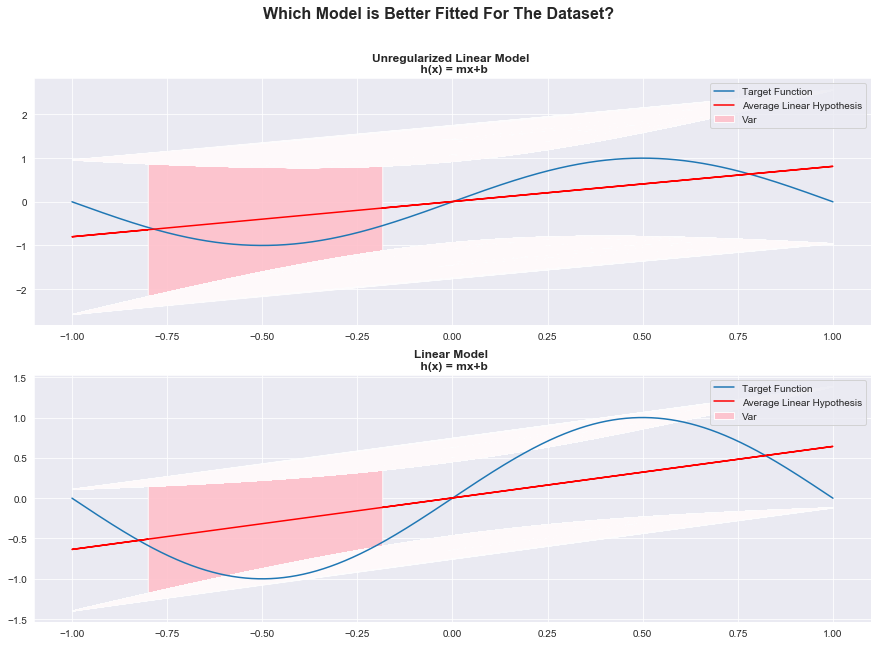

In [136]:
sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (15, 10)})
f, ax = plt.subplots(2,sharex=False)
ax[0].plot(target_x, np.sin(np.pi*target_x), label = 'Target Function')
ax[0].plot(point1.T[1], g_bar_un[1]*point1.T[1] + g_bar_un[0], color = 'r', label = 'Average Linear Hypothesis')
ax[0].fill_between(point1.T[1] , unr_upper_limit, unr_lower_limit, alpha = 0.9, facecolor = 'pink', label = 'Var')
ax[0].legend()
ax[0].set_title("Unregularized Linear Model \n h(x) = mx+b", fontsize = '12', weight = 'bold')


ax[1].plot(target_x, np.sin(np.pi*target_x), label = 'Target Function')
ax[1].plot(point1.T[1], g_bar_r[1]*point1.T[1] + g_bar_r[0], color = 'r', label = 'Average Linear Hypothesis')
ax[1].legend()
ax[1].set_title("Regularized Linear Model \n h(x) = mx+b", fontsize = '12', weight = 'bold')
ax[1].fill_between(point1.T[1] , r_upper_limit, r_lower_limit, interpolate=True, alpha = 0.9, facecolor = 'pink', label = 'Var')
ax[1].legend()
ax[1].set_title("Linear Model \n h(x) = mx+b", fontsize = '12', weight = 'bold')

f.suptitle('Which Model is Better Fitted For The Dataset?', fontsize = '16', weight = 'bold')
plt.show()

## Problem 2

Consider the perceptron model in two dimensions with corresponding weights
$w0$, $w1$, and $w2$ in figure 1.
1. Determine the equation of the line in $x2 = mx1 + b$ form.
2. Provide a set of values for $w0$, $w1$, and $w2$.
3. Figure 2 shows a perceptron diagram that implements an AND logical operator. Draw a similar diagram for the perceptron model that corresponds to the boundary decision in figure 1.

## Problem 3

An online rental video company is interested in creating a model to make movie recommendations to one of its customers, Ms. X. As a consultant to this company, you are provided with the history of the movies that she accepted or rejected to watch. She makes her selections solely based on the movie genre and critic ratings. The data is in movieData.csv on Canvas.

1. Train a perceptron that will create a linear boundary decision that will help the company to make future recommendations to Ms. X. After how many iterations does the algorithm converge?
2. Upon creating a model, plot the boundary line along with all the data points and axes clearly marked.

![title](chart.png)

In [37]:
movie_df

,Genre,CriticsRating,Watched
0,1,1.2,-1
1,1,3.5,1
2,1,4.2,1
3,2,3.9,1
4,2,2.8,-1
5,3,3.0,-1
6,5,4.5,-1
7,4,1.8,-1
8,1,2.1,-1
9,3,4.8,1


In [56]:
#Pick random w's
w = np.array([0.9,2,0.5])

X = np.array([np.array([1, movie_df['Genre'].iloc[i] ,movie_df['CriticsRating'].iloc[i]])for i in range(13)])

y = np.array(movie_df.Watched)

h = np.sign(np.dot(X,w))

#Adjusts w until h converges to y
count = 0
while(np.array_equal(y,h) == False):
    misclass_index = np.where(y!=h)[0]
    misclass = random.choice(misclass_index)
    oldw = w 
    w = oldw + (y[misclass]*X[misclass])
    h = np.sign(np.dot(X,w))
    count = count + 1
count

95

In [57]:
X.T[1]

array([1., 1., 1., 2., 2., 3., 5., 4., 1., 3., 5., 3., 3.])

In [58]:
w

array([-20.1,  -8. ,  12.7])

In [59]:
t = np.linspace(0,6, 1000)
for val in t:
    slope = -(w[1]/w[2])  
    intercept = -w[0]/w[2]

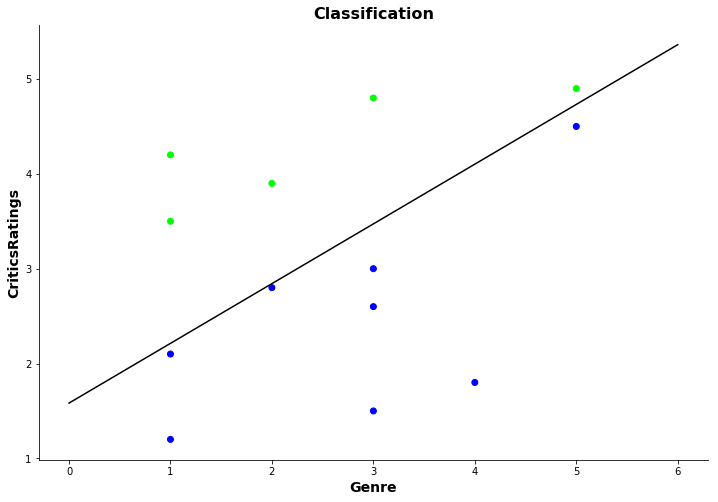

In [60]:
x_range = range(13)
fig, ax = plt.subplots(figsize = (12.0, 8.0))
ax.scatter(movie_df.Genre, movie_df.CriticsRating, c=movie_df.Watched, cmap = 'brg')
ax.plot(t, slope*t + intercept, color='k')
ax.set_xlabel("Genre", weight = "bold", fontsize = 14)
ax.set_ylabel("CriticsRatings", weight = "bold", fontsize = 14)
ax.set_title("Classification", weight = "bold", fontsize = 16)
sns.despine()
t = np.linspace(0,5, 1000)

## Problem 4

In this problem you will use the data in siCoData.csv file to train a neural network. Use the backpropagation algorithm to train a 3-layer (input, hidden,output) neural network. Use stochastic gradient decent (SGD) technique and assume that the activation function for the hidden layer and output layer are tanh and linear, respectively. (You must write your own code for BP and SGD).

1. The stopping criteria for training in this problem should be a combination of achieving a minimum in-sample error <br/> $E_{in} = \frac{1}{N}\sum_{n=1}^{N} e_{n}$ <br/> and reaching a maximum number of epochs (In this expression N is the number of observations in the data set and en is the error corresponding to each individual training point). Report the minimum Ein that you could achieve along with the related weights and number of iterations.

2. Graph the original data (y vs. x) and the predicted values ($\hat{y}$ vs. x) on two separate scatter plots.